## **Loca Como Tu Madre**
### Análise das operações Jul/22 a Jan/23

In [1]:
from IPython import display

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns; sns.set()
import datetime
import nbformat
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode (connected = True )
import plotly.graph_objs as go
import plotly.offline as py
from matplotlib.backends.backend_pdf import PdfPages
from fpdf import FPDF
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import locale
import plotly.io as pio
from datetime import date
import calendar

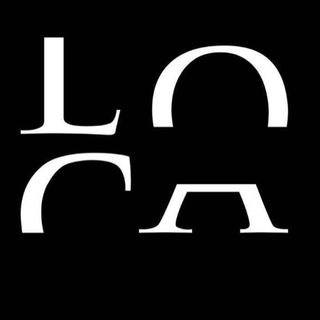

In [2]:
display.Image("/home/claudio/@LCTM/lctm001/lctm_logo.jpg",width=215)

In [3]:
# setar locale para português para que os dias da semana retornem em portugês no código abaixo.
locale.setlocale(locale.LC_ALL, 'pt_BR.utf-8')

# Importing each csv file and then joinning then, 
# as the files for other months are send by the client we can insert each one at the end of this code

df1 = pd.read_csv(r'/home/claudio/@LCTM/lctm001/2022_07.csv', encoding="ISO-8859-1", sep = ';')
df2 = pd.read_csv(r'/home/claudio/@LCTM/lctm001/2022_08.csv', encoding="ISO-8859-1", sep = ';')
df3 = pd.read_csv(r'/home/claudio/@LCTM/lctm001/2022_09.csv', encoding="ISO-8859-1", sep = ';')
df4 = pd.read_csv(r'/home/claudio/@LCTM/lctm001/2022_10.csv', encoding="ISO-8859-1", sep = ';')
df5 = pd.read_csv(r'/home/claudio/@LCTM/lctm001/2022_11.csv', encoding="ISO-8859-1", sep = ';')
df6 = pd.read_csv(r'/home/claudio/@LCTM/lctm001/2022_12.csv', encoding="ISO-8859-1", sep = ';')
df7 = pd.read_csv(r'/home/claudio/@LCTM/lctm001/2023_01.csv', encoding="ISO-8859-1", sep = ';')

In [4]:
transactions = pd.concat([df1, df2, df3, df4, df5, df6, df7], ignore_index=True)

In [5]:
## DROPPING THE ROWS THAT ALL COLUMN VALUES ARE NULL
#  https://www.youtube.com/watch?v=uDr67HBIPz8&t=818s

transactions = transactions.dropna(how='all')

In [6]:
del transactions['Vr. Desconto']
del transactions['Valor Venda']
del transactions['Tx Serviço']
del transactions["Caixa"]
del transactions['Operador']
del transactions['Data Cancelamento']
del transactions['Operador Cancelamento']
del transactions['Operador Desconto']
del transactions['Operador Desc Repique']
del transactions['NRC']
del transactions['Comandas']
del transactions['Série NFCE']
del transactions['Série NFE']
del transactions['Integração']
del transactions['Observação']
del transactions['CO_CLIENTE']
del transactions['Atendente']
del transactions['IC_REVENDA']

In [7]:
# renomeei a coluna 'Tipo Operação' para 'venda'.
transactions.rename(columns = {'Tipo Operação':'venda'}, inplace = True)

In [8]:
# Pandas Drop Rows Based on Column Value
# https://sparkbyexamples.com/pandas/pandas-delete-rows-based-on-column-value/
transactions.drop(transactions[transactions['venda'] == 'CO_VENDA'].index, inplace = True)

In [9]:
# renomeei a coluna 'Cod Venda' para 'prim_col'.
transactions.rename(columns = {'Cod Venda':'prim_col'}, inplace = True)

In [10]:
# If 'prim_col' value is not empty, set the value of column 'venda' to the value of column 'prim_col', else value of column 'venda' stays the same
transactions['venda'] = transactions.apply(lambda row: row['prim_col'] if row['venda'] == 'LOCA' else row['venda'], axis=1)

# If 'prim_col' value is not empty, set the value of column 'venda' to the value of column 'prim_col', else value of column 'venda' stays the same
transactions['venda'] = transactions.apply(lambda row: row['prim_col'] if row['venda'] == 'Balcao' else row['venda'], axis=1)

# Vamos analisar cada parte dessa linha:
#transactions['venda']: Estamos nos referindo à coluna 'venda' do DataFrame transactions.
# Essa coluna será atualizada com base no resultado da operação que será realizada a seguir.
#transactions.apply(...): O método apply() é usado para aplicar uma função a todas as linhas 
# (ou colunas) de um DataFrame. Neste caso, a função está sendo aplicada às linhas, conforme
# especificado pelo argumento axis=1.
#lambda row: ...: Estamos usando uma função lambda, que é uma função anônima e de uso único.
# Essa função aceita um argumento chamado row, que representa uma linha do DataFrame transactions.
#row['prim_col'] if row['venda'] == 'LOCA' else row['venda']: Esta é a lógica da função lambda.
# Estamos usando uma expressão condicional para verificar se o valor da coluna 'venda' na
# linha atual (row['venda']) é igual a 'LOCA'. Se for verdade, o valor da coluna 'prim_col'
# na mesma linha (row['prim_col']) será usado como resultado. Caso contrário, o próprio valor da coluna 'venda' será mantido.

In [11]:
# Função para verificar se o valor é uma string e contém apenas letras, testando se o código da celula anterior funcionou
def is_string_with_letters(value):
    return isinstance(value, str) and value.isalpha()

# Aplicando o filtro para manter apenas as linhas onde o valor da coluna 'venda' é uma string e contém apenas letras
filtered_transactions = transactions[transactions['venda'].apply(is_string_with_letters)]

# filtered_transactions

In [12]:
# Função para verificar se o valor é uma data
def is_date(value):
    try:
        pd.to_datetime(value)
        return True
    except ValueError:
        return False

# Função para aplicar à coluna
def copy_date_or_set_nd(value):
    return value if is_date(value) else 'nd'

In [13]:
# Criar a nova coluna 'data_venda' aplicando a função copy_date_or_set_nd
transactions['data_venda'] = transactions['Data Venda'].apply(copy_date_or_set_nd)

In [14]:
# Criar a nova coluna 'data_recebimento' aplicando a função copy_date_or_set_nd
transactions['data_recebimento'] = transactions['Data Recebimento'].apply(copy_date_or_set_nd)

In [15]:
# Convert the "venda" variable from object type to integer type
transactions['venda'] = np.int64(transactions['venda'])

In [16]:
# Agrupar o DataFrame pela coluna 'venda'
grouped = transactions.groupby('venda')

# Para cada grupo, encontrar a primeira data na coluna "data_venda" e atualizar todas as linhas do grupo
for group_name, group_df in grouped:
    first_date = group_df['data_venda'].apply(is_date).idxmax()
    matching_date = transactions.loc[first_date, 'data_venda']
    
    transactions.loc[transactions['venda'] == group_name, 'data_venda'] = matching_date

In [17]:
# Agrupar o DataFrame pela coluna 'venda'
grouped = transactions.groupby('venda')

# Para cada grupo, encontrar a primeira data na coluna "data_recebimento" e atualizar todas as linhas do grupo
for group_name, group_df in grouped:
    first_date_recebimento = group_df['data_recebimento'].apply(is_date).idxmax()
    matching_date = transactions.loc[first_date_recebimento, 'data_recebimento']
    
    transactions.loc[transactions['venda'] == group_name, 'data_recebimento'] = matching_date

In [18]:
# Agrupando as linhas com base na coluna 'venda'
grouped_transactions = transactions.groupby('venda')

# Preenchendo os valores nulos na coluna 'Vendedor' com o primeiro valor não nulo encontrado dentro do grupo
transactions['Vendedor'] = grouped_transactions['Vendedor'].transform(lambda x: x.ffill().bfill())


In [19]:
# Deletando a primeira coluna, pois não será mais utilizada
del transactions['prim_col']

In [20]:
# Deletando linhas com valor NaN na coluna 'NFe'
transactions = transactions.dropna(subset=['NFe'])

In [21]:
# Renomeando várias colunas
transactions = transactions.rename(columns={
    'NFe': 'cod_produto',
    'NFCe': 'produto',
    'Data Venda': 'quantidade',
    'Data Recebimento' : 'valor_unit',
    'Nome Cliente': 'total_item',
    'Valor Recebido': 'data_lanc',
    'Operação': 'atendente',
    'Vendedor': 'vendedor'
})

In [22]:
# Aplicando o filtro para marcar as linhas onde o valor da coluna 'quantidade' é igual a uma data
filtered_transactions_quantidade= transactions[transactions['quantidade'].apply(is_date)]
# depois quero deletar essa linha filtrada
transactions.drop(filtered_transactions_quantidade.index, inplace=True)

In [23]:
# Fazendo algumas conversôes

In [24]:
# Convert coluna "quantidade" variable from object type to integer type
transactions['quantidade'] = np.int64(transactions['quantidade'])

In [25]:
# change the decimal separator of the the variable "valor_unit" from "," to "."
# https://cursos.alura.com.br/forum/topico-transformar-pontos-por-virgulas-dentro-de-um-dataframe-121090
transactions['valor_unit'] = transactions['valor_unit'].str.replace(",",".")
transactions['valor_unit'] = transactions['valor_unit'].astype(float)

In [26]:
# change the decimal separator of the the variable "valor_unit" from "," to "."
# https://cursos.alura.com.br/forum/topico-transformar-pontos-por-virgulas-dentro-de-um-dataframe-121090
transactions['total_item'] = transactions['total_item'].str.replace(",",".")
transactions['total_item'] = transactions['total_item'].astype(float)

In [27]:
transactions['data_lanc'] = pd.to_datetime(transactions['data_lanc'], format='%d/%m/%Y %H:%M:%S')

In [28]:
transactions['data_venda'] = pd.to_datetime(transactions['data_venda'], format='%d/%m/%Y %H:%M:%S')

In [29]:
transactions['data_recebimento'] = pd.to_datetime(transactions['data_recebimento'], format='%d/%m/%Y %H:%M:%S')

In [30]:
# Criação de colunas para facilitar a análise

In [31]:
# Creating a horario column that is a copy of data_hora and coverting it to datetime and extracting only the day;
transactions['data'] = (transactions['data_lanc'])
transactions['data'] = transactions['data'].dt.date

In [32]:
# insert a column name 'mes' 
transactions['mes'] = transactions.data_lanc.dt.month

In [33]:
# add hora and minuto column; using class attributes .hour and .minute

transactions['hora'] = transactions.data_lanc.dt.hour
transactions['minuto'] = transactions.data_lanc.dt.minute

In [34]:
transactions['hora_minuto']=pd.to_datetime(transactions['data_lanc'])

transactions['hora_minuto'] = transactions['hora_minuto'].dt.time

In [35]:
# ### Extracting only the Date from 'data_lanc' column as Datetime format
transactions['data_normal'] = transactions['data_lanc'].dt.normalize()

In [36]:
# Definindo a função time_of_day
def time_of_day(hora):
    """
    Determina se a  compra foi feita pela manhã, tarde ou noite.
    """
    
    if hora < 12:
        
        return 'manhã'
    
    elif hora < 17:
        
        return 'tarde'
    
    else:
        
        return 'noite'
    
transactions['periodo_do_dia'] = transactions.hora.apply(time_of_day)

In [37]:
# Add a day of week variable and a second classifier of weekday or weekend
transactions['dia_da_semana'] = [calendar.day_name[i.weekday()] for i in transactions['data_lanc']]

In [38]:
# Add a tipo_de_dia variable (FS= final de semana or DU=  dia útil)
transactions['tipo_de_dia'] = ['FS' if (i == 'domingo') | (i == 'sábado') else 'DU' for i in 
                                                                            transactions['dia_da_semana']]

In [39]:
# Verificando se o valor "total_item" é igual a: "quantidade" * "valor_unit"

transactions["total_item_verif"] = transactions['quantidade']* transactions['valor_unit']

In [40]:
# Continuando o item anterior
# https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

transactions['confirm'] = np.where(transactions['total_item'] > transactions['total_item_verif'], True, False)

In [41]:
#### Creating a Column diference
transactions['diference']=(transactions['total_item'])-(transactions['total_item_verif'])

In [42]:
# continuando o item anterior
resumo = transactions.loc[transactions["confirm"] == True, ["total_item", "total_item_verif", 'diference']].sum()

###############################################################################################################################
#Não encontramos nenhuma divergência entre os valores ao efetuarmos a multiplicação do valor de venda do item por sua quantidade, 
# e compararmos com o valor expresso na coluna "total_item", o valor dessa diferença é zero.

In [43]:
# vamos deletar as colunas utilizadas para fazer o cálculo anterior
transactions.drop('total_item_verif', axis=1, inplace= True)
transactions.drop('confirm', axis=1, inplace= True)
transactions.drop('diference', axis=1, inplace= True)

In [44]:
transactions.head()

cod_produto                    produto  quantidade  valor_unit  total_item  \
2         421  BURRATA COM JAMON E VERDE           1        49.0        49.0   
3          41              PORÇAO NACHOS           1        15.0        15.0   
4          97  JARRA SANGRIA LOCA SUMMER           1        55.0        55.0   
5         406            LULAS EMPANADAS           1        38.0        38.0   
6           2       RISOTINHO DE CAMARÃO           1        52.0        52.0   

            data_lanc atendente   venda vendedor          data_venda  \
2 2022-07-30 20:03:12   JESSICA  981201  JESSICA 2022-07-30 20:02:56   
3 2022-07-30 20:17:28   JESSICA  981201  JESSICA 2022-07-30 20:02:56   
4 2022-07-30 20:22:20   GABRIEL  981201  JESSICA 2022-07-30 20:02:56   
5 2022-07-30 21:22:51   JESSICA  981201  JESSICA 2022-07-30 20:02:56   
6 2022-07-30 22:26:07   JESSICA  981201  JESSICA 2022-07-30 20:02:56   

     data_recebimento        data  mes  hora  minuto hora_minuto data_normal  \
2 2022-07-30 22:58:00  2022-07-30    7    20       3    20:03:12  2022-07-30   
3 2022-07-30 22:58:00  2022-07-30    7    20      17    20:17:28  2022-07-30   
4 2022-07-30 22:58:00  2022-07-30    7    20      22    20:22:20  2022-07-30   
5 2022-07-30 22:58:00  2022-07-30    7    21      22    21:22:51  2022-07-30   
6 2022-07-30 22:58:00  2022-07-30    7    22      26    22:26:07  2022-07-30   

  periodo_do_dia dia_da_semana tipo_de_dia  
2          noite        sábado          FS  
3          noite        sábado          FS  
4          noite        sábado          FS  
5          noite        sábado          FS  
6          noite        sábado          FS

# **Exploração dos Dados**

In [45]:
faturamento = transactions['total_item'].sum().round(decimals = 2)
print('O faturamento no período foi de: R$',faturamento)

O faturamento no período foi de: R$ 884024.4


### Observações
Alguns itens chamaram a atenção:

Eventos: foram identificados 7 registros de eventos. No entanto, como não conseguimos determinar quais itens foram vendidos nessas ocasiões, optamos por excluí-los da análise. Considerando que o escopo do trabalho é analisar os produtos vendidos, horário e dia, bem como sua quantidade, fica inviável realizar um estudo sem essas informações;

Couvert artístico: seria interessante obter informações sobre os artistas que se apresentaram nesses horários, pois poderíamos investigar quais deles atraem um público maior e que permanece mais tempo no estabelecimento;

Os dados também apresentaram dois tipos de entrada que não estão especificadas: "item extra" (73 registros) e "porção extra" (36 registros). Portanto, esses registros também serão retirados da análise.

Abaixo segue uma tabela com o Ranking dos produtos mais vendidos, já considerando-se essas exclusões

In [46]:
# Find Unique Values of each item sold in the Column "produto"
# https://www.statology.org/pandas-unique-values-in-column/
# Pandas: get first 10 elements of a series
top_produtos = transactions.produto.value_counts()
# print (top_produtos[:20])

In [47]:
# dropping the rows as explain above.

# Pandas Drop Rows Based on Column Value
# https://sparkbyexamples.com/pandas/pandas-delete-rows-based-on-column-value/

array= ['EVENTO.', 'EVENTO', 'PORÇAO EXTRA', "ITEM EXTRA", 'EVENTO CORPORATIVO' ]
transactions.drop(transactions[transactions.produto.isin(array)].index, inplace = True)

In [48]:
### Converting a Series to a dataframe and changing the namee of the column
top_produtos_df = top_produtos.to_frame().reset_index()
top_produtos_df.rename(columns = {'produto':'quantidade', 'index':'produto'}, inplace = True)

In [49]:
### Gráfico 01

fig_top_produtos = go.Figure(data=[go.Table(
    header=dict(values=list(top_produtos_df.columns),
                font=dict(color='white', size=12), # configurando a cor e tamanho da letra
                fill_color='black',
                align='left'),
    cells=dict(values=[top_produtos_df['produto'], top_produtos_df['quantidade'] ],
               font=dict(color='white', size=12),
               fill_color='gray',
               align='left'))
])


fig_top_produtos.update_layout(
    title={
        'text': "Produtos mais vendidos - (Jul 2022 - Jan 23)",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

py.iplot(fig_top_produtos)

## Algumas métricas importantes

Após a filtragem dos regitros conforme a explicação acima, teos algumas métricas para apresentar:

In [50]:
faturamento_sem_eventos= transactions['total_item'].sum().round(decimals = 2)
print('O faturamento desconsiderando-se os eventos no período foi de: R$', faturamento_sem_eventos)

O faturamento desconsiderando-se os eventos no período foi de: R$ 865321.6


In [51]:
## Get unique names in the "produto" column using Series.unique() 
## https://sparkbyexamples.com/pandas/pandas-count-unique-values-in-column/
num_itens_vend = transactions.produto.unique().size

print('O número de diferentes itens vendido pelo estabelecimento é:', num_itens_vend)

O número de diferentes itens vendido pelo estabelecimento é: 283


In [52]:
# achando a média do numero de itens vendidos por dia
grouped_by_date = pd.DataFrame(transactions.groupby(by='data_normal')['quantidade'].sum()).reset_index()
print('O número médio de itens vendidos em um dia é: \n{0}'.format(
    grouped_by_date.quantidade.mean().round(decimals = 2)))

O número médio de itens vendidos em um dia é: 
226.58


In [53]:
# Look at the average number of items purchased...

avg_items = transactions.groupby(by='venda')['produto'].count().mean()

print('A média de itens por venda é: %.2f itens' %avg_items)

A média de itens por venda é: 8.60 itens


In [54]:
# ...and how that varies by time of day

single_transaction = pd.DataFrame(transactions.groupby(by='venda')['quantidade'].sum())

single_transaction = single_transaction.merge(transactions[['hora','minuto','periodo_do_dia','data_normal', 'venda']]\
                                              .drop_duplicates('venda'), left_on=single_transaction.index, 
                                              right_on='venda', how='left', copy=False)

st01 = single_transaction.groupby(by='periodo_do_dia')['quantidade'].mean().round (decimals=2)
st01 = st01.to_frame().reset_index()
st01.rename(columns = {'periodo_do_dia':'Período', 'quantidade':'Média'}, inplace = True)

print('A média de itens por venda e por período do dia é: \n{0}'.format(st01.sort_values(by=['Média'],ascending=False)))

A média de itens por venda e por período do dia é: 
  Período  Média
2   tarde  11.29
1   noite   8.59
0   manhã   2.99


In [55]:
# GRAFICO 07
# Creating a table and an animated frequencie line

 <h2> Quantidade de itens vendidos por dia ao longo do perído analisado</h2>

In [56]:
# Sales trend by date
# https://www.youtube.com/watch?v=Xjm7fOw6gjY
# use reset index for transforming the data in a variable not a index

grouped_by_date = pd.DataFrame(transactions.groupby(by=['data','dia_da_semana'])['quantidade'].sum().reset_index())

vendas = px.line(grouped_by_date, x = 'data', y = 'quantidade', hover_data=["dia_da_semana"],
                 title = 'Itens vendidos por dia - Jul/22 a Jan/23<br />destacando os jogos do Brasil na Copa do Mundo 2022', labels= {'quantidade' : 'Quantidade','data': 'Data'})

# update line color
vendas.update_traces(line_color='black')

# update backgournd
vendas.update_layout(
    plot_bgcolor='gray', 
    xaxis =dict(mirror=True,
    ticks='outside', showline=True, linecolor='black', gridcolor='lightgray'),
    yaxis =dict(mirror=True, ticks='outside', showline=True, linecolor='black', gridcolor='lightgray')
)

# adicionando anaotação
# https://plotly.com/python/styling-plotly-express/
vendas.add_annotation( # add a text callout with arrow
    text="1° jogo", x="2022-11-24", y=1500, arrowhead=1, showarrow=True)
vendas.add_annotation( # add a text callout with arrow
    text="2° jogo", x="2022-11-28", y=1100, arrowhead=1, showarrow=True)
vendas.add_annotation( # add a text callout with arrow
    text="3° jogo", x="2022-12-02", y=800, arrowhead=1, showarrow=True)
vendas.add_annotation( # add a text callout with arrow
    text="4° jogo", x="2022-12-05", y=1300, arrowhead=1, showarrow=True)
vendas.add_annotation( # add a text callout with arrow
    text="5° jogo", x="2022-12-09", y=1000, arrowhead=1, showarrow=True)

py.iplot(vendas)

Observamos que durante a Copa do Mundo houve uma queda sinificativa do faturamento do estabelecimento

In [57]:
# jupyter nbconvert --to html --no-input lctm_v01.ipynb

### Percentual dos produtos vendidos no período

Agora iremos analisar mais detalhadamente a distribuição na venda de cada item proporcionalmente as vendas totais

In [58]:
# find the percentage each item is selling
top_produtos_perc = transactions.produto.value_counts(True)
# print (top_produtos_perc[:10])

In [59]:
#### Converting to a Dataframe
top_produtos_perc_df = top_produtos_perc.to_frame().reset_index()

top_produtos_perc_df.rename(columns = {'produto':'proporção', 'index':'produto'}, inplace = True)

In [60]:
# inserting a column Ranking based on the value of the column proporção

# https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

In [61]:
# if a prduct has a percentage greater than 1,7%, its ranked, 
# if lower than this its aggregate with 'outros'

top_produtos_perc_df['ranking']= np.where (
    top_produtos_perc_df['proporção']> 0.0170, 
    top_produtos_perc_df['produto'], 'outros' )

In [62]:
# Inserir um gráfico de pizza da tabela acima
# GRÁFICO 3A

In [63]:
fig_pie_3 = go.Figure(data=[go.Pie(labels=top_produtos_perc_df['ranking'], values=top_produtos_perc_df['proporção'])])

fig_pie_3.layout = dict(title="Percentual dos itens mais vendidos (Jul 2022 - Jan 23) <br><sup></sup>", showlegend=True
)

fig_pie_3.update_traces(hoverinfo='label+percent', textfont_size=11,
                  )

py.iplot(fig_pie_3)

Observações

In [64]:
# Creating a plot with the TOP itens sold per period of the day
# GRÁFICO 04

In [112]:
# Find the frequency of each item purchased and by time of day

item_frequencies_all = transactions.produto.value_counts()
item_frequencies_morning = transactions[transactions.periodo_do_dia == 'manhã'].produto.value_counts()
item_frequencies_afternoon = transactions[transactions.periodo_do_dia == 'tarde'].produto.value_counts()
item_frequencies_evening = transactions[transactions.periodo_do_dia == 'noite'].produto.value_counts()

In [136]:
# Plot the frequency of purchase for each item

# https://community.plotly.com/t/errors-accessing-plotly-api/33271
# ok, so I found a solution to my problem - when I let my program run through, the error message produced is:
#chart_studio.exceptions.PlotlyRequestError: Authentication credentials were not provided.
#I Googled this error and there were suggestions to run plotly in offline mode by replacing:



# Solving the problem of the 'plotly' online library with chart_studio
# https://plotly.com/python/getting-started-with-chart-studio/

##  Now I'm using Plotly Express (px) and Graphics Objects (go) # 13/03/2023

button_layer_1_height = 1.12
button_layer_2_height = 1.065

item_threshold_all = 330
item_threshold_noite = 300
item_threshold_other = 20

# https://plotly.com/python/bar-charts/#basic-bar-charts-with-plotlygraphobjects
# Customizing Individual Bar Colors

# Cores das barras todo dia
colors1 = ['black',] * len(transactions)
#colors1[13]= 'crimson' # destacar a venda de café

# Cores das barras manhã
colors2 = ['black',] * len(transactions)
#colors2[12]= 'crimson' # destacar venda de café

# Cores das barras tarde
colors3 = ['black',] * len(transactions)
#colors3[11]= 'crimson' # destacar venda de café

# Cores das barras noite
colors4 = ['black',] * len(transactions)
#colors4[18]= 'crimson' # destacar venda de café



# https://plotly.com/python/bar-charts/#basic-bar-charts-with-plotlygraphobjects - customizando as barras
trace_all = go.Bar(
            x=item_frequencies_all[item_frequencies_all > item_threshold_all].index,
            y=item_frequencies_all[item_frequencies_all > item_threshold_all].values,text=item_frequencies_all,
            visible=True,
            marker_color=colors1,
            name='Dia Inteiro'
    )

trace_morning = go.Bar(
            x=item_frequencies_morning[item_frequencies_morning > item_threshold_other].index,
            y=item_frequencies_morning[item_frequencies_morning > item_threshold_other].values,text=item_frequencies_morning,
            visible=False,
            marker_color= colors2,
            name='Manhã'
    )

trace_afternoon = go.Bar(
            x=item_frequencies_afternoon[item_frequencies_afternoon > item_threshold_other].index,
            y=item_frequencies_afternoon[item_frequencies_afternoon > item_threshold_other].values,text=item_frequencies_afternoon,
            visible=False,
            marker_color=colors3,
            name='Tarde'
    )

trace_evening = go.Bar(
            x=item_frequencies_evening[item_frequencies_evening > item_threshold_noite].index,
            y=item_frequencies_evening[item_frequencies_evening > item_threshold_noite].values,text=item_frequencies_evening,
            visible=False,
            marker_color= colors4,
            name='Noite'
    )



data04 = [trace_all, trace_morning, trace_afternoon, trace_evening]


In [137]:
# Inserir um update _layout para colocar um subtitle
# https://stackoverflow.com/questions/58166002/how-to-add-caption-subtitle-using-plotly-method-in-python

In [138]:

updatemenus = list([
    
    dict(
         buttons=list([   
            dict(label = 'Dia inteiro',
                 method = 'update',
                 args = [{'visible': [True, False, False, False]},
                         {'title': 'Os mais vendidos por período (Fev 2022 - Out 22) <br><sup>Dia inteiro - produtos com mais de 225 itens vendidos</sup>'}]),
             
            dict(label = 'Manhã',
                 method = 'update',
                 args = [{'visible': [False, True, False, False]},
                         {'title': 'Os mais vendidos por período (Fev 2022 - Out 22) <br><sup>Manhã - produtos com mais de 125 itens vendidos</sup>'}]),
             
            dict(label = 'Tarde',
                 method = 'update',
                 args = [{'visible': [False, False, True, False]},
                         {'title': 'Os mais vendidos por período (Fev 2022 - Out 22) <br><sup>Tarde - produtos com mais de 125 itens vendidos</sup>'}]),
             
            dict(label = 'Noite',
                 method = 'update',
                 args = [{'visible': [False, False, False, True]},
                         {'title': 'Os mais vendidos por período (Fev 2022 - Out 22) <br><sup>Noite - produtos com mais de 125 itens vendidos</sup>'}])
        ]),
        type='buttons',
        direction = 'right',
        pad = {'r': 10, 't': 10},
        showactive = True,
        x = 0.6, # range from -2 to 3
        xanchor = 'left',
        y = button_layer_1_height,
        yanchor = 'top' )
])

In [139]:
            
layout04 = dict(title="Os mais vendidos por período (Fev 2022 - Out 22) <br><sup>Dia inteiro -- produtos com mais de 225 itens vendidos</sup>", showlegend=False,
              updatemenus=updatemenus)

# to change the background color

layout04.update(
    plot_bgcolor='lightgray', 
    xaxis =dict(mirror=True, ticks='outside', showline=True, linecolor='black', gridcolor='lightgray'),
    yaxis =dict(mirror=True, ticks='outside', visible= False, showline=True, linecolor='black', gridcolor='lightgray')
)

In [140]:
fig04 = dict(data=data04, layout=layout04)

py.iplot(fig04)

In [141]:
# jupyter nbconvert --to html --no-input lctm_v01.ipynb
